In [1]:
import pandas as pd
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

     |████████████████████████████████| 41 kB 364 kB/s             
     |████████████████████████████████| 9.2 MB 18.5 MB/s            


In [3]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 12), reused 63 (delta 10), pack-reused 0
Unpacking objects: 100% (68/68), 20.59 MiB | 5.88 MiB/s, done.


You can get your validation results using 3 methods
- by showing the Analyzer
- extract values from the validity returned list from fit_predict function
- extract values from the Analyzer dictionary


The algorithm is associated with five built-in validity measures, which are:
- ACC, Accuracy
- F1 score
- NMI index (Normalized Mutual Information)
- AMI index (Adjusted Mutual Information)
- ARI index (Adjusted Rand Index)

Dataset: aggregation
Plotting dataset Groundtruth


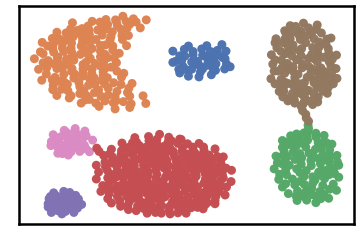

Plotting train data


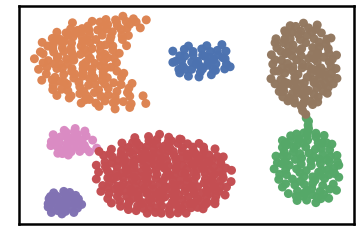

Validating train data
├── exec_time
│   ├── DenMune: 0.093
│   ├── NGT: 0.015
│   └── t_SNE: 0
├── n_clusters
│   ├── actual: 7
│   └── detected: 7
├── n_points
│   ├── dim: 2
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 0
│   ├── plot_size: 788
│   ├── size: 788
│   ├── strong: 492
│   └── weak
│       ├── all: 296
│       ├── failed to merge: 0
│       └── succeeded to merge: 296
└── validity
    └── train
        ├── ACC: 785
        ├── AMI: 0.988
        ├── ARI: 0.993
        ├── F1: 0.996
        ├── NMI: 0.988
        ├── completeness: 0.987
        └── homogeneity: 0.989



In [4]:
# Let us show the analyzer by set show_analyzer to True, which is actually the default parameter's value

data_path = 'datasets/denmune/shapes/'  
dataset = "aggregation" 
knn = 6

data_file = data_path + dataset + '.csv'
X_train = pd.read_csv(data_file, sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1)   

print ("Dataset:", dataset)
dm = DenMune(train_data=X_train,
            train_truth=y_train,
            k_nearest=knn,
            rgn_tsne=False)

labels, validity = dm.fit_predict(show_noise=True, show_analyzer=True)


In [5]:
# secondly, we can extract validity returned list from fit_predict function
dm = DenMune(train_data=X_train, train_truth=y_train, k_nearest=knn, rgn_tsne=False)
labels, validity = dm.fit_predict(show_plots=False, show_noise=True, show_analyzer=False)
validity

{'train': {'ACC': 785,
  'F1': 0.9962034083064701,
  'NMI': 0.9882680312048461,
  'AMI': 0.9880984055236919,
  'ARI': 0.9927076502018027,
  'homogeneity': 0.9891992975556994,
  'completeness': 0.9873385166573364}}

In [6]:
Accuracy = validity['train']['ACC']
print ('Accuracy:',Accuracy, 'correctely identified points')

F1_score = validity['train']['F1']
print ('F1 score:', round(F1_score*100,2), '%')

NMI = validity['train']['NMI']
print ('NMI index:', round(NMI*100,2), '%')

AMI = validity['train']['AMI']
print ('AMI index:', round(AMI*100,2), '%')

ARI = validity['train']['ARI']
print ('ARI index:', round(ARI*100,2), '%')


Accuracy: 785 correctely identified points
F1 score: 99.62 %
NMI index: 98.83 %
AMI index: 98.81 %
ARI index: 99.27 %


In [7]:
# Third, we can extract extract values from the Analyzer dictionary
dm = DenMune(train_data=X_train, train_truth=y_train, k_nearest=knn, rgn_tsne=False)
labels, validity = dm.fit_predict(show_plots=False, show_noise=True, show_analyzer=False)
dm.analyzer

{'n_points': {'size': 788,
  'noise': {'type-1': 0, 'type-2': 0},
  'weak': {'all': 296, 'succeeded to merge': 296, 'failed to merge': 0},
  'dim': 2,
  'strong': 492,
  'plot_size': 788},
 'exec_time': {'t_SNE': 0,
  'NGT': 0.015134811401367188,
  'DenMune': 0.08765053749084473},
 'n_clusters': {'actual': 7, 'detected': 7},
 'validity': {'train': {'ACC': 785,
   'F1': 0.9962034083064701,
   'NMI': 0.9882680312048461,
   'AMI': 0.9880984055236919,
   'ARI': 0.9927076502018027,
   'homogeneity': 0.9891992975556994,
   'completeness': 0.9873385166573364}}}

In [8]:
Accuracy = dm.analyzer['validity']['train']['ACC']
print ('Accuracy:',Accuracy, 'correctely identified points')

F1_score = dm.analyzer['validity']['train']['F1']
print ('F1 score:', round(F1_score*100,2), '%')

NMI = dm.analyzer['validity']['train']['NMI']
print ('NMI index:', round(NMI*100,2), '%')

AMI = dm.analyzer['validity']['train']['AMI']
print ('AMI index:', round(AMI*100,2), '%')

ARI = dm.analyzer['validity']['train']['ARI']
print ('ARI index:', round(ARI*100,2), '%')

Accuracy: 785 correctely identified points
F1 score: 99.62 %
NMI index: 98.83 %
AMI index: 98.81 %
ARI index: 99.27 %
